# Michał Matejczuk #
## PD1/10-ręki bandyta-greedy/d) ##

In [92]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
def bandit(Q, eps, alpha, steps, modif):
    estimates = [Q]*10
    optimal_counter = 0
    optimal_percent = [0]*steps
    for i in range (steps):
        if random.uniform(0,1) > eps:
            max_value = max(estimates)
            max_indices = [index for index, value in enumerate(estimates) if value == max_value]
            game_action_index = random.randint(0, len(max_indices)-1)
            game_action = max_indices[game_action_index]
        else:
            game_action = random.randint(0, len(estimates)-1)
            
        if game_action == 0:
            R = abs(np.random.standard_cauchy(1)[0])-modif
            optimal_counter += 1
        else:
            R = np.random.normal()
        estimates[game_action] = estimates[game_action] + alpha*(R-estimates[game_action])
        optimal_percent[i] = optimal_counter/(i+1)
        
    return optimal_percent

Text(0, 0.5, '% Optimal action')

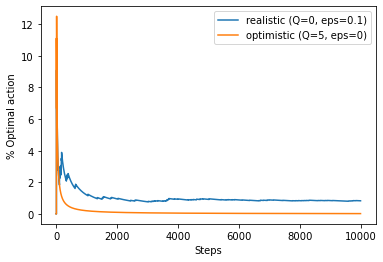

In [151]:
#realistic (Q=0, eps=0.1)
real_percentages = np.array(bandit(0, 0.1, 0.1, 10000, 50))*100

#optimistic (Q=5, eps=0)
opt_percentages = np.array(bandit(5, 0, 0.1, 10000, 50))*100

sns.lineplot(x=range(0, 10000), y=real_percentages, label = "realistic (Q=0, eps=0.1)")
sns.lineplot(x=range(0, 10000), y=opt_percentages, label = "optimistic (Q=5, eps=0)")
plt.xlabel('Steps')
plt.ylabel('% Optimal action')

Mimo, że moduł z rozkładu Cauchy'ego minus 50 ma nieskończoną wartość oczekiwaną, to liczby wygenerowane z tego rozkładu bardzo rzadko będą większe od 0, a często znacznie mniejsze niż -3, więc najczęściej estymator nagrody dla tej "ręki" bardzo szybko będzie miał niskie wartości. Oznacza to, że wybieranie zachłanne najczęściej nie będzie go wybierać. Na wykresie widać, że dla parametrów optymistycznych (Q=5, eps=0) procent optymalnych wyborów bardzo szybko dąży do zera, zaś dla parametrów realistycznych(Q=0, eps=0.1) dąży do wartości około 1%, co jest równie łatwo wytłumaczane (10% wyborów jest eksploracją, z czego 1/10 będzie eksploracją "ręki" z rozkładem Cauchy'ego)

Text(0, 0.5, '% Optimal action')

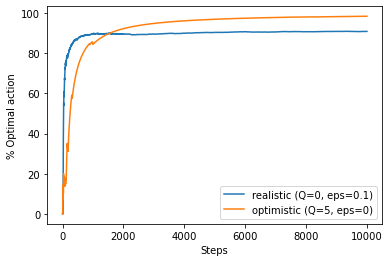

In [152]:
#realistic (Q=0, eps=0.1)
real_percentages = np.array(bandit(0, 0.1, 0.1, 10000, 0))*100

#optimistic (Q=5, eps=0)
opt_percentages = np.array(bandit(5, 0, 0.1, 10000, 0))*100

sns.lineplot(x=range(0, 10000), y=real_percentages, label = "realistic (Q=0, eps=0.1)")
sns.lineplot(x=range(0, 10000), y=opt_percentages, label = "optimistic (Q=5, eps=0)")
plt.xlabel('Steps')
plt.ylabel('% Optimal action')

Dla porównania, dla rozkładu bez odjęcia 50 gry z oboma zestawami parametrów szybko osiągają wysokie procenty optymalności, nieco wolniej ale skuteczniej robi to gra z paramtrami optymistycznymi (po pewnym czasie zdaje się wybiera prawie zawsze "rękę" z rozkładem Cauchy'ego)